# Pycaret

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from pycaret.classification import *

pd.set_option('display.max_columns', None)

In [3]:
# 데이터 불러오기
anal_data = pd.read_csv("'21년 해카톤_분석데이터셋.csv")
anal_data.head()

,PSN_BIZR_YN,SEX_SCN_NM,CUS_AGE,CUS_ADM_TRY_NM,CUS_N_ADMZ_NM,CLB_HOUS_PYG_NM,REAI_BZTC_AVG_PCE,WHOLE_CNTC,CNTC_SERV,CNTC_CST,CNTC_B/S,CNTC_EST,CNTC_C/C,CNTC_EVT,CNTC_INVIT,CNTC_F/S,CNTC_T/D,CNTC_TM,CAR_CGRD_NM_1,CAR_CGRD_NM_2,PUR_NUM,ET
0,N,남자,66,서울특별시,구,32,107744.0,12.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,승용,대형,2,6개월이상
1,N,남자,63,경상북도,군,32,18016.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,승용,준중형,2,6개월이상
2,Y,남자,58,전라남도,군,32,20192.0,17.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,승용,대형,2,6개월이상
3,Y,남자,57,서울특별시,구,34,130000.0,21.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,승용,대형,3,6개월이상
4,N,남자,60,서울특별시,구,21,70707.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,승용,대형,3,6개월미만


In [4]:
anal_data['PSN_BIZR_YN'] = anal_data['PSN_BIZR_YN'].map({'N':0,'Y':1}).astype(int)
anal_data['SEX_SCN_NM'] = anal_data['SEX_SCN_NM'].map({'여자':0,'남자':1}).astype(int)
anal_data['CUS_ADM_TRY_NM'] = anal_data['CUS_ADM_TRY_NM'].map({'서울특별시':0,'부산광역시':1,'대구광역시':2,'인천광역시':3,'광주광역시':4,'대전광역시':5,
                                                           '울산광역시':6,'세종특별자치시':7,'경기도':8,'강원도':9,'충청북도':10,'충청남도':11,
                                                           '전라북도':12,'전라남도':13,'경상북도':14,'경상남도':15,'제주특별자치도':16}).astype(int)
anal_data['CUS_N_ADMZ_NM'] = anal_data['CUS_N_ADMZ_NM'].map({'군':0,'구':1,'시':1}).astype(int)
anal_data['CAR_CGRD_NM_1'] = anal_data['CAR_CGRD_NM_1'].map({'승용':0,'RV':1,'해당없음':2}).astype(int)
anal_data['CAR_CGRD_NM_2'] = anal_data['CAR_CGRD_NM_2'].map({'대형':0,'대형SUV':0,'승용_미식별':0,'중형':1,'중형SUV':1,'RV_미식별':1,'준중형':2,'준중형SUV':2,'소형':3,'스포츠':4}).astype(int)
anal_data['ET'] = anal_data['ET'].map({'6개월이상':0,'6개월미만':1}).astype(int)

In [5]:
anal_data = anal_data.astype(int)
anal_data.info()
anal_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250609 entries, 0 to 250608
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   PSN_BIZR_YN        250609 non-null  int32
 1   SEX_SCN_NM         250609 non-null  int32
 2   CUS_AGE            250609 non-null  int32
 3   CUS_ADM_TRY_NM     250609 non-null  int32
 4   CUS_N_ADMZ_NM      250609 non-null  int32
 5   CLB_HOUS_PYG_NM    250609 non-null  int32
 6   REAI_BZTC_AVG_PCE  250609 non-null  int32
 7   WHOLE_CNTC         250609 non-null  int32
 8   CNTC_SERV          250609 non-null  int32
 9   CNTC_CST           250609 non-null  int32
 10  CNTC_B/S           250609 non-null  int32
 11  CNTC_EST           250609 non-null  int32
 12  CNTC_C/C           250609 non-null  int32
 13  CNTC_EVT           250609 non-null  int32
 14  CNTC_INVIT         250609 non-null  int32
 15  CNTC_F/S           250609 non-null  int32
 16  CNTC_T/D           250609 non-null  in

,PSN_BIZR_YN,SEX_SCN_NM,CUS_AGE,CUS_ADM_TRY_NM,CUS_N_ADMZ_NM,CLB_HOUS_PYG_NM,REAI_BZTC_AVG_PCE,WHOLE_CNTC,CNTC_SERV,CNTC_CST,CNTC_B/S,CNTC_EST,CNTC_C/C,CNTC_EVT,CNTC_INVIT,CNTC_F/S,CNTC_T/D,CNTC_TM,CAR_CGRD_NM_1,CAR_CGRD_NM_2,PUR_NUM,ET
0,0,1,66,0,1,32,107744,12,7,5,0,0,0,0,0,0,0,0,0,0,2,0
1,0,1,63,14,0,32,18016,2,2,0,0,0,0,0,0,0,0,0,0,2,2,0
2,1,1,58,13,0,32,20192,17,15,2,0,0,0,0,0,0,0,0,0,0,2,0
3,1,1,57,0,1,34,130000,21,15,6,0,0,0,0,0,0,0,0,0,0,3,0
4,0,1,60,0,1,21,70707,10,5,5,0,0,0,0,0,0,0,0,0,0,3,1


In [5]:
Pycaret = setup(data=anal_data, target='ET', train_size=0.7, normalize=True,
                normalize_method="zscore", numeric_imputation="mean", categorical_imputation="constant",
                categorical_features=[], numeric_features=['CNTC_B/S','CNTC_INVIT','CNTC_F/S','CNTC_TM','PUR_NUM'])

,Description,Value
0,session_id,8003
1,Target,ET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(250609, 22)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# 가장 적합한 모델 선별
compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6567,0.6672,0.8640,0.6750,0.7579,0.1978,0.2165,2.7670
gbc,Gradient Boosting Classifier,0.6560,0.6654,0.8697,0.6728,0.7587,0.1924,0.2128,29.7470
xgboost,Extreme Gradient Boosting,0.6535,0.6620,0.8559,0.6744,0.7544,0.1932,0.2098,17.1630
ada,Ada Boost Classifier,0.6509,0.6586,0.8682,0.6690,0.7557,0.1791,0.1990,7.8450
lda,Linear Discriminant Analysis,0.6439,0.6445,0.9107,0.6532,0.7608,0.1327,0.1654,1.0440
ridge,Ridge Classifier,0.6433,0.0000,0.9188,0.6511,0.7621,0.1259,0.1615,0.3590
rf,Random Forest Classifier,0.6313,0.6273,0.7974,0.6714,0.7290,0.1657,0.1718,35.2560
lr,Logistic Regression,0.6292,0.6325,0.9707,0.6313,0.7650,0.0464,0.0906,4.1830
et,Extra Trees Classifier,0.6229,0.6126,0.7820,0.6681,0.7206,0.1516,0.1561,49.6080
knn,K Neighbors Classifier,0.5881,0.5589,0.7411,0.6474,0.6911,0.0814,0.0831,8.2880


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=8003, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
           

# LightGBM (Light Gradient Boosting Machine)

In [17]:
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from lightgbm import plot_importance    # plot_importance : Feature 중요도 출력 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
dataset = anal_data
features = dataset.loc[:,'PSN_BIZR_YN':'PUR_NUM']
target = dataset.loc[:,'ET':]

In [13]:
# 더비변수 생성 
# 생성된 더미변수를 CSV로 저장한 후 다시 가져와야 분석이 가능함
dataset = anal_data
dataset = pd.get_dummies(dataset, columns = ["CAR_CGRD_NM_1"], prefix="AC")  # AC_0, AC_1 이런식으로 칼럼 새로 생길 예정
dataset = pd.get_dummies(dataset, columns = ["CAR_CGRD_NM_2"], prefix="BC")
dataset = pd.get_dummies(dataset, columns = ["CUS_N_ADMZ_NM"], prefix="AA")
dataset = pd.get_dummies(dataset, columns = ["CUS_ADM_TRY_NM"], prefix="BA")
dataset.to_csv("'21년 해카톤_분석데이터셋(변수형변환).csv", encoding='utf-8-sig')

In [15]:
dataset = pd.read_csv("'21년 해카톤_분석데이터셋(변수형변환).csv", encoding='utf-8-sig')
del dataset['Unnamed: 0']

In [16]:
# 종속변수가 마지막에 오도록 순서 재배치 
dataset = dataset[['PSN_BIZR_YN', 'SEX_SCN_NM', 'CUS_AGE', 'CLB_HOUS_PYG_NM','REAI_BZTC_AVG_PCE',
                   'WHOLE_CNTC', 'CNTC_SERV', 'CNTC_CST', 'CNTC_EST', 'CNTC_EVT', 'CNTC_INVIT', 'CNTC_TM', 'PUR_NUM', 
                   'CNTC_C/C', 'CNTC_B/S', 'CNTC_F/S','CNTC_T/D','PUR_NUM','AC_0','AC_1','AC_2','BC_0','BC_1','BC_2',
                   'BC_3','BC_4','AA_0','AA_1','BA_0','BA_1','BA_2','BA_3','BA_4',
                   'BA_5','BA_6','BA_7','BA_8','BA_9','BA_10','BA_11','BA_12','BA_13','BA_14','BA_15','BA_16','ET']]

In [34]:
# train/test dataset parameter 설명
# train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
# arrays : 분할 시킬 데이터 (Numpy array, Pandas dataframe 등)
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
# random_state : 데이터 분할 시 셔플을 위한 시드값 (int나 RandomState로 입력)
# shuffle : 셔플 여부 설정 (default = True)
# stratify : 지정한 Data의 비율을 유지. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
ss = StandardScaler()

# 종속변수와 독립변수로 나눔
features = dataset.iloc[:,:-1]
target = dataset.iloc[:,45:46]

# train/test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=156)

# 독립변수 정규화 시키기 
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

train_acc_es, test_acc_es = [],[]
n_estimators=range(10,201,10)            #n_estimator를 10에서 10씩 증가해서 200까지 돌려봄 
for i in n_estimators:
    gbm_wrapper = LGBMClassifier(n_estimators=i, random_state=6086, max_depth=3)
    gbm_wrapper.fit(x_train, y_train)
    train_acc_es.append(gbm_wrapper.score(x_train, y_train))
    test_acc_es.append(gbm_wrapper.score(x_test, y_test))
    
train_acc_max, test_acc_max = [],[]
max_depth = range(11)
for j in max_depth:
    lgbm_wrapper = LGBMClassifier(n_estimators=100, random_state=6086, max_depth=j)
    lgbm_wrapper.fit(x_train, y_train)
    train_acc_max.append(lgbm_wrapper.score(x_train, y_train))
    test_acc_max.append(lgbm_wrapper.score(x_test, y_test))

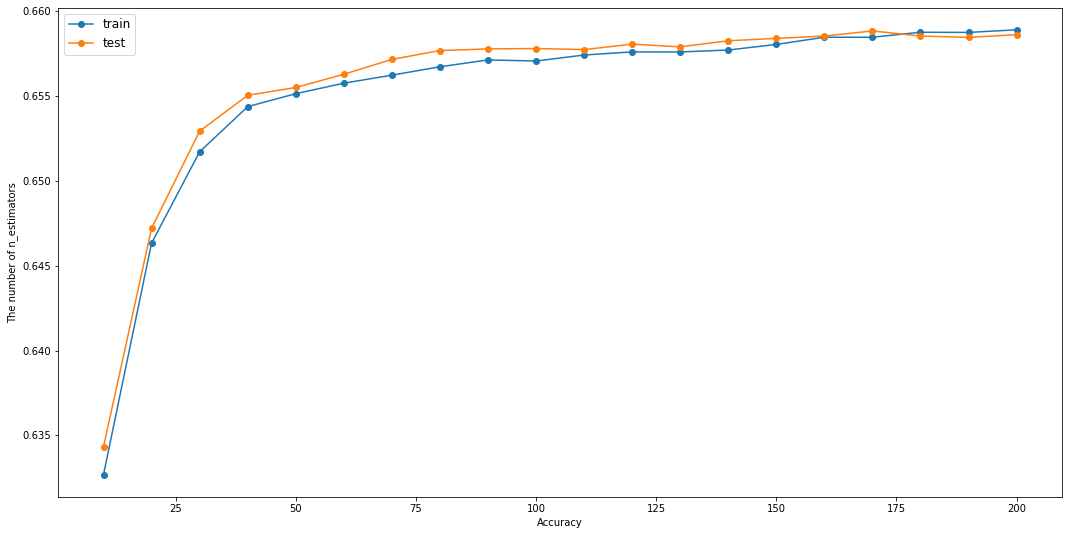

In [35]:
# n_estimators에 따른 score비교 
plt.figure(figsize=(18,9))
plt.plot(n_estimators,train_acc_es, label="train", marker='o')
plt.plot(n_estimators,test_acc_es, label="test", marker='o')
plt.xlabel('Accuracy')
plt.ylabel('The number of n_estimators')
plt.legend(fontsize=12)

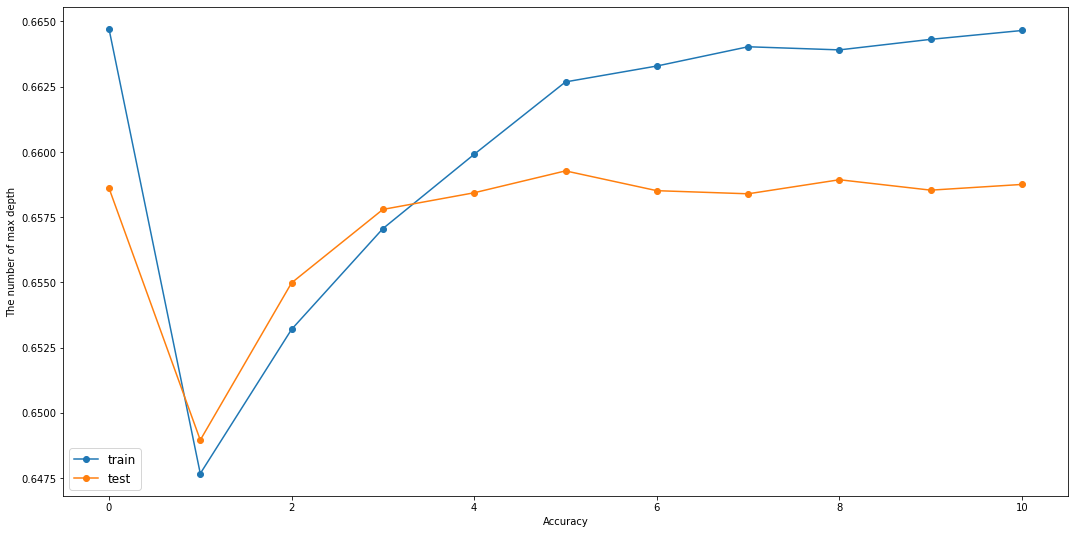

In [36]:
# max_depth에 따른 score비교
plt.figure(figsize=(18,9))
plt.plot(max_depth,train_acc_max, label="train", marker='o')
plt.plot(max_depth,test_acc_max, label="test", marker='o')
plt.xlabel('Accuracy')
plt.ylabel('The number of max depth')
plt.legend(fontsize=12)

In [ ]:
# 평가 함수 생성
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n',confusion)
    print('\n정확도:',format(accuracy))
    print('정밀도:',format(precision))
    print('재현율:',format(recall))
    print('F1:',format(F1))
    print('AUC:',format(AUC))

예측값 : [0 1 1 ... 1 1 1]
예측값 확률 [0.4849739  0.71987677 0.71683804 ... 0.72906808 0.64406875 0.60791736]
오차행렬:
 [[ 5863 12993]
 [ 4107 27159]]

정확도: 65.88
정밀도: 0.6764046622833234
재현율: 0.8686432546536174
F1: 0.7605645635554061
AUC: 0.5897893829483615


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

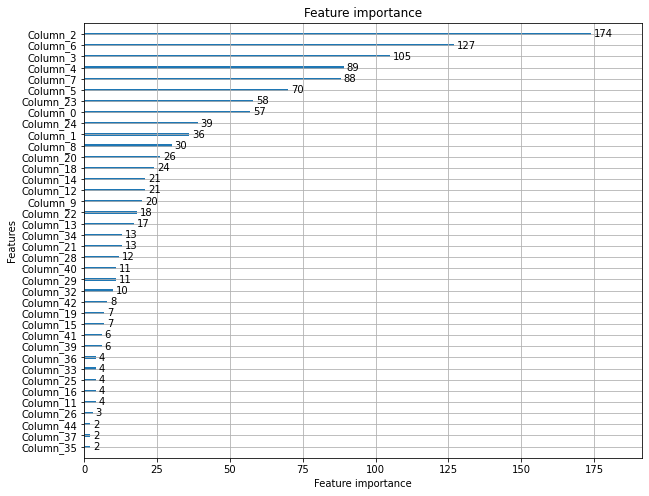

In [51]:
# learning_rate=0.1일때 
# 검증 데이터 할당
lgbm_wrapper = LGBMClassifier(n_estimators=170, random_state=6086, max_depth=3, learning_rate=0.1)
lgbm_wrapper.fit(x_train, y_train)

#예측값 할당
preds = lgbm_wrapper.predict(x_test)
#예측값 확률중 Positive(1)로 분류될 확률만 할당
preds_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

print(f"예측값 : {preds}")
print(f"예측값 확률 {preds_proba}")

get_clf_eval(y_test, preds)
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(lgbm_wrapper, ax)

예측값 : [0 1 1 ... 1 1 1]
예측값 확률 [0.48612185 0.70305519 0.71590651 ... 0.73952167 0.64584212 0.61840824]
오차행렬:
 [[ 5614 13242]
 [ 3948 27318]]

정확도: 65.7
정밀도: 0.6735207100591716
재현율: 0.8737286509307235
F1: 0.760671623089132
AUC: 0.5857294081976485


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

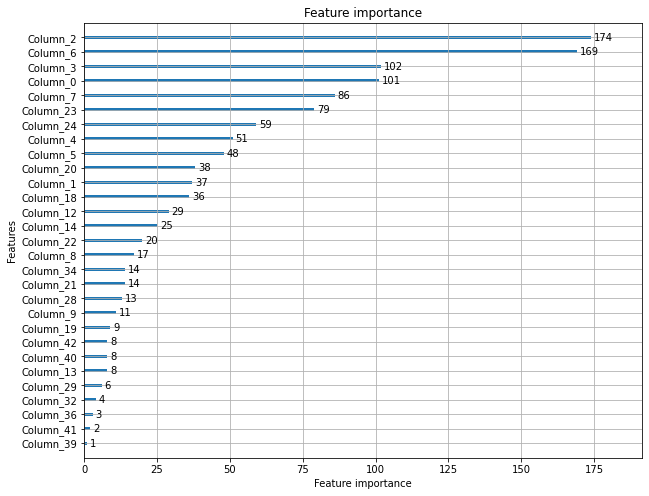

In [52]:
# learning_rate=0.05일때 
lgbm_wrapper = LGBMClassifier(n_estimators=170, random_state=6086, max_depth=3, learning_rate=0.05)
lgbm_wrapper.fit(x_train, y_train)
preds = lgbm_wrapper.predict(x_test)
preds_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

print(f"예측값 : {preds}")
print(f"예측값 확률 {preds_proba}")

get_clf_eval(y_test, preds)
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(lgbm_wrapper, ax)

예측값 : [1 1 1 ... 1 1 1]
예측값 확률 [0.55233392 0.70842192 0.69432366 ... 0.74321224 0.63801734 0.63283395]
오차행렬:
 [[ 4662 14194]
 [ 3118 28148]]

정확도: 65.46
정밀도: 0.6647772896887252
재현율: 0.9002750591697051
F1: 0.7648081730246712
AUC: 0.5737586581380982


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

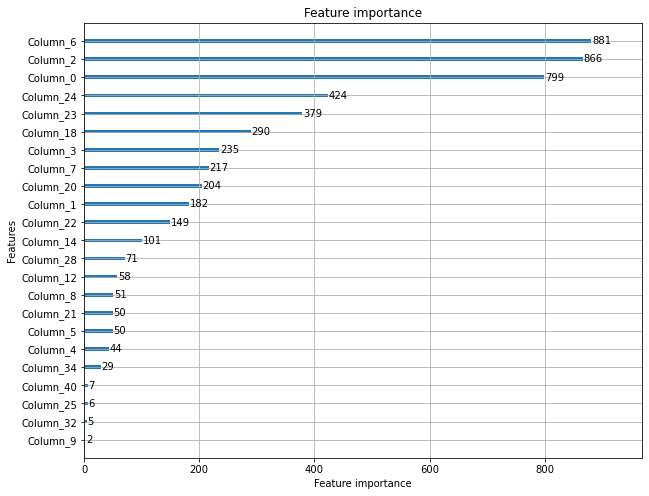

In [53]:
# learning_rate=0.01일때 
lgbm_wrapper = LGBMClassifier(n_estimators=170, random_state=6086, max_depth=j, learning_rate=0.01)
lgbm_wrapper.fit(x_train, y_train)
preds = lgbm_wrapper.predict(x_test)
preds_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

print(f"예측값 : {preds}")
print(f"예측값 확률 {preds_proba}")

get_clf_eval(y_test, preds)
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(lgbm_wrapper, ax)

# GBC (Gradient Boosting Classifier)

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
### 데이터 새로 가져오기 
dataset2 = pd.read_csv("'21년 해카톤_분석데이터셋(변수형변환).csv")
dataset2.info()
dataset2.head()
del dataset2['Unnamed: 0']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250609 entries, 0 to 250608
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Unnamed: 0         250609 non-null  int64
 1   PSN_BIZR_YN        250609 non-null  int64
 2   SEX_SCN_NM         250609 non-null  int64
 3   CUS_AGE            250609 non-null  int64
 4   CLB_HOUS_PYG_NM    250609 non-null  int64
 5   REAI_BZTC_AVG_PCE  250609 non-null  int64
 6   WHOLE_CNTC         250609 non-null  int64
 7   CNTC_SERV          250609 non-null  int64
 8   CNTC_CST           250609 non-null  int64
 9   CNTC_B/S           250609 non-null  int64
 10  CNTC_EST           250609 non-null  int64
 11  CNTC_C/C           250609 non-null  int64
 12  CNTC_EVT           250609 non-null  int64
 13  CNTC_INVIT         250609 non-null  int64
 14  CNTC_F/S           250609 non-null  int64
 15  CNTC_T/D           250609 non-null  int64
 16  CNTC_TM            250609 non-null  in

In [72]:
# 종속변수가 마지막에 오도록 순서 재배치 
dataset2 = dataset2[['PSN_BIZR_YN', 'SEX_SCN_NM', 'CUS_AGE', 'CLB_HOUS_PYG_NM','REAI_BZTC_AVG_PCE',
                   'WHOLE_CNTC', 'CNTC_SERV', 'CNTC_CST', 'CNTC_EST', 'CNTC_EVT', 'CNTC_INVIT', 'CNTC_TM', 'PUR_NUM', 
                   'CNTC_C/C', 'CNTC_B/S', 'CNTC_F/S','CNTC_T/D','PUR_NUM','AC_0','AC_1','AC_2','BC_0','BC_1','BC_2',
                   'BC_3','BC_4','AA_0','AA_1','BA_0','BA_1','BA_2','BA_3','BA_4',
                   'BA_5','BA_6','BA_7','BA_8','BA_9','BA_10','BA_11','BA_12','BA_13','BA_14','BA_15','BA_16','ET']]

In [76]:
ss = StandardScaler()

# 종속변수와 독립변수로 나눔
features2 = dataset2.iloc[:,:-1]
target2 = dataset2.iloc[:,45:46]

# train/test dataset 분할
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=156)

# 독립변수 정규화 시키기 
x_train2 = ss.fit_transform(x_train2)
x_test2 = ss.transform(x_test2)

train_acc_es2, test_acc_es2 = [],[]
n_estimators=range(10,201,10)            #n_estimator를 10에서 10씩 증가해서 200까지 돌려봄 
for i in n_estimators:
    gbc = GradientBoostingClassifier(n_estimators=i, random_state=8459, max_depth=3)
    gbc.fit(x_train2, y_train2)
    train_acc_es2.append(gbc.score(x_train2, y_train2))
    test_acc_es2.append(gbc.score(x_test2, y_test2))
    
train_acc_max2, test_acc_max2 = [],[]
max_depth = range(11)
for j in max_depth:
    gbc = GradientBoostingClassifier(n_estimators=100, random_state=8459, max_depth=3)
    gbc.fit(x_train2, y_train2)
    train_acc_max2.append(gbc.score(x_train2, y_train2))
    test_acc_max2.append(gbc.score(x_test2, y_test2))

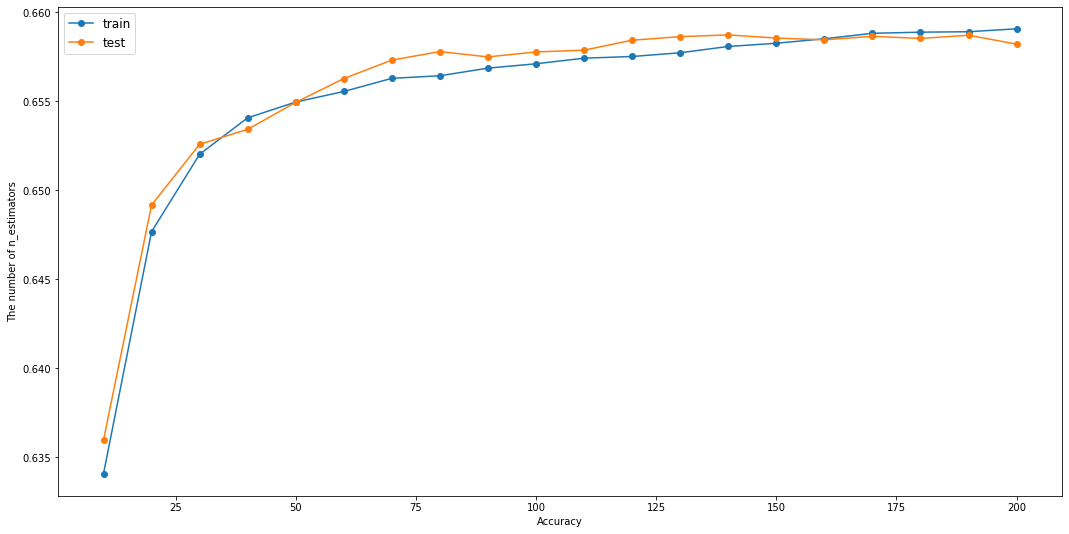

In [77]:
# n_estimators에 따른 score비교 
plt.figure(figsize=(18,9))
plt.plot(n_estimators,train_acc_es2, label="train", marker='o')
plt.plot(n_estimators,test_acc_es2, label="test", marker='o')
plt.xlabel('Accuracy')
plt.ylabel('The number of n_estimators')
plt.legend(fontsize=12)

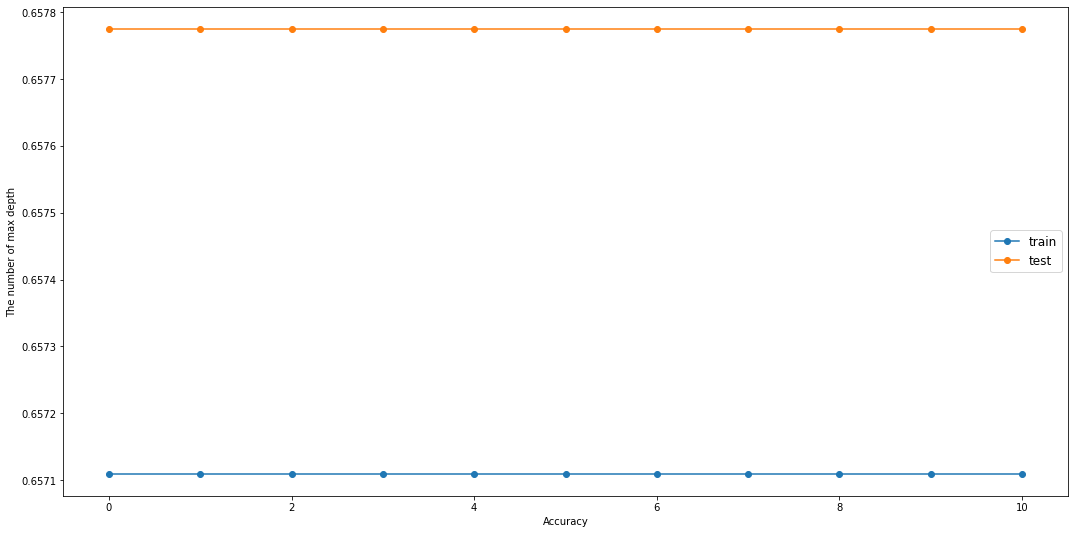

In [78]:
# max_depth에 따른 score비교
plt.figure(figsize=(18,9))
plt.plot(max_depth,train_acc_max2, label="train", marker='o')
plt.plot(max_depth,test_acc_max2, label="test", marker='o')
plt.xlabel('Accuracy')
plt.ylabel('The number of max depth')
plt.legend(fontsize=12)

In [83]:
# learning_rate=0.1일때 
# 검증 데이터 할당 
gbc = GradientBoostingClassifier(random_state=8459, max_depth=3, learning_rate=0.1, n_estimators=140)
gbc.fit(x_train2, y_train2)
preds2 = gbc.predict(x_test2)
preds_proba2 = gbc.predict_proba(x_test2)[:,1]

print(f"예측값 : {preds2}")
print(f"예측값 확률 {preds_proba2}")

get_clf_eval(y_test2, preds2)

예측값 : [0 1 1 ... 1 1 1]
예측값 확률 [0.47634126 0.71927067 0.72168389 ... 0.73584889 0.64008351 0.62191817]
오차행렬:
 [[ 5860 12996]
 [ 4109 27157]]

정확도: 65.87
정밀도: 0.6763380071227555
재현율: 0.8685792874048487
F1: 0.7604979067195003
AUC: 0.5896778490482029


In [84]:
# learning_rate=0.05일때
gbc = GradientBoostingClassifier(random_state=8459, max_depth=3, learning_rate=0.05, n_estimators=140)
gbc.fit(x_train2, y_train2)
preds2 = gbc.predict(x_test2)
preds_proba2 = gbc.predict_proba(x_test2)[:,1]

print(f"예측값 : {preds2}")
print(f"예측값 확률 {preds_proba2}")

get_clf_eval(y_test2, preds2)

예측값 : [0 1 1 ... 1 1 1]
예측값 확률 [0.49906362 0.70627553 0.7161502  ... 0.74143481 0.64739637 0.62215028]
오차행렬:
 [[ 5517 13339]
 [ 3831 27435]]

정확도: 65.74
정밀도: 0.6728552508951783
재현율: 0.8774707349836883
F1: 0.761660188784009
AUC: 0.5850283246407623


In [87]:
# learning_rate=0.01일때
gbc = GradientBoostingClassifier(random_state=8459, max_depth=3, learning_rate=0.01, n_estimators=140)
gbc.fit(x_train2, y_train2)
preds2 = gbc.predict(x_test2)
preds_proba2 = gbc.predict_proba(x_test2)[:,1]

print(f"예측값 : {preds2}")
print(f"예측값 확률 {preds_proba2}")

get_clf_eval(y_test2, preds2)

예측값 : [1 1 1 ... 1 1 1]
예측값 확률 [0.5458251  0.68910409 0.68721521 ... 0.73114057 0.61191624 0.62036478]
오차행렬:
 [[ 2365 16491]
 [ 1478 29788]]

정확도: 64.15
정밀도: 0.6436612718511636
재현율: 0.9527282031599821
F1: 0.7682764846218324
AUC: 0.5390762356487224


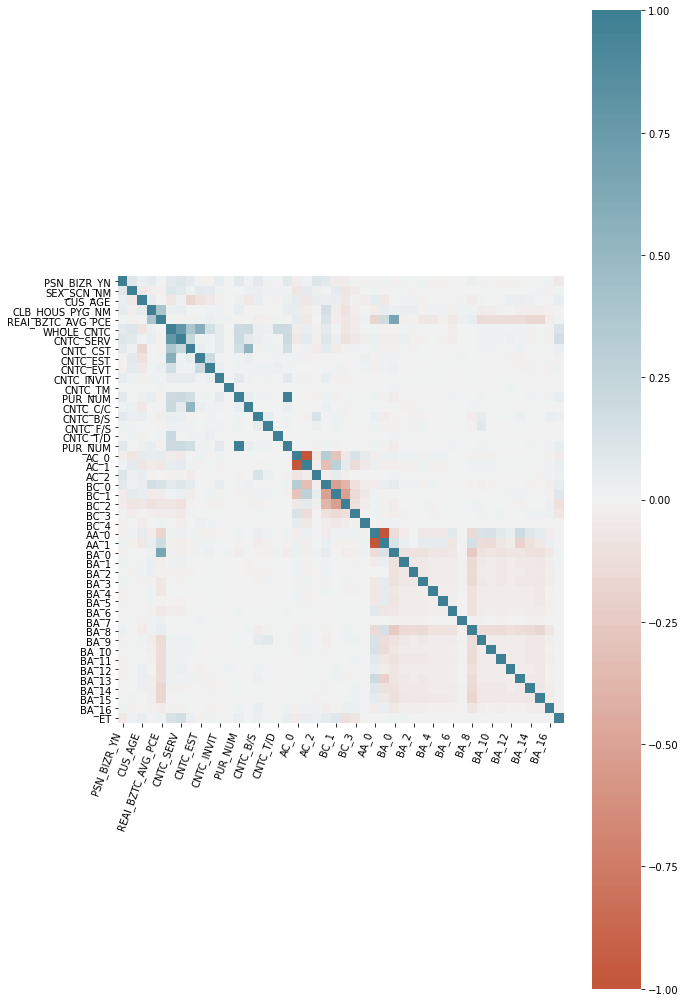

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 18))
corr = dataset2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);